In [3]:
%config Completer.use_jedi = False

In [24]:
import pandas as pd
# import hydrobr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
from datetime import datetime
# from datetime import timedelta
import glob
import geopandas as gpd
import geobr

In [5]:
# Caminhos dos diretórios raiz
# general_path = 'C:/Users/cnalm/OneDrive/Hidroweb'    # Caminho do projeto (Cristiano)
# general_path = 'D:/Dados_Nuvem/OneDrive/Hidroweb'   # Colocar aqui o caminho de Filipe
general_path = 'C:/Users/linde/OneDrive/Hidroweb'   # Colocar aqui o caminho de Lindemberg

In [6]:
# df_all_gauges = hydrobr.get_data.ANA.list_prec_stations() 
# df_all_gauges

In [7]:
df_downloaded_station_info = pd.read_hdf(general_path + '/Consolidated Files/BRASIL_RAW_NOT_CEMADEN_LIST_GAUGES.h5')
df_downloaded_station_info.head()

,Name,Code,Type,SubBasin,City,State,Responsible,Latitude,Longitude,StartDate,EndDate,Years,Percentage_of_missing_data,Years_without_gaps,Percentage_of_missing_years
0,SALINÓPOLIS,00047000,2,32,SALINÓPOLIS,PARÁ,INMET,-0.6500,-47.5500,1958/01/01,1964/12/31,7,25.0,0,100.0
1,SALINÓPOLIS,00047002,2,32,SALINÓPOLIS,PARÁ,ANA,-0.6231,-47.3536,1977/12/09,2019/08/31,43,3.5,35,18.6
2,CURUÇA,00047003,2,32,CURUÇA,PARÁ,ANA,-0.7375,-47.8536,1981/07/01,2019/07/31,39,2.4,29,25.6
3,PRIMAVERA,00047004,2,32,PRIMAVERA,PARÁ,ANA,-0.9294,-47.0994,1982/02/18,2019/08/31,38,0.0,35,7.9
4,MARUDA,00047005,2,32,MARAPANIM,PARÁ,ANA,-0.6336,-47.6583,1989/08/21,2019/07/31,31,5.0,20,35.5


In [8]:
downloaded_station_list = df_downloaded_station_info['Code'].values.tolist()
len(downloaded_station_list)

11726

In [9]:
# Deleting no data stations from the rain gauge list
df_downloaded_station_info['StartDate'] = pd.to_datetime(df_downloaded_station_info['StartDate'])
df_downloaded_station_info['EndDate'] = pd.to_datetime(df_downloaded_station_info['EndDate'])
df_downloaded_station_info.to_hdf(general_path + '/Consolidated Files/BRASIL_RAW_SUMMARY_DOWNLOADED.h5', 'table_data', append = False, complevel = 9, encoding="cp860")
df_downloaded_station_info

,Name,Code,Type,SubBasin,City,State,Responsible,Latitude,Longitude,StartDate,EndDate,Years,Percentage_of_missing_data,Years_without_gaps,Percentage_of_missing_years
0,SALINÓPOLIS,00047000,2,32,SALINÓPOLIS,PARÁ,INMET,-0.6500,-47.5500,1958-01-01,1964-12-31,7,25.0,0,100.0
1,SALINÓPOLIS,00047002,2,32,SALINÓPOLIS,PARÁ,ANA,-0.6231,-47.3536,1977-12-09,2019-08-31,43,3.5,35,18.6
2,CURUÇA,00047003,2,32,CURUÇA,PARÁ,ANA,-0.7375,-47.8536,1981-07-01,2019-07-31,39,2.4,29,25.6
3,PRIMAVERA,00047004,2,32,PRIMAVERA,PARÁ,ANA,-0.9294,-47.0994,1982-02-18,2019-08-31,38,0.0,35,7.9
4,MARUDA,00047005,2,32,MARAPANIM,PARÁ,ANA,-0.6336,-47.6583,1989-08-21,2019-07-31,31,5.0,20,35.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11721,ÁGUA FRIA,08460003,2,14,UIRAMUTA,RORAIMA,ANA,4.6428,-60.4964,1996-03-02,2018-04-30,23,1.8,16,30.4
11722,UIRAMUTA,08460004,2,14,UIRAMUTA,RORAIMA,ANA,4.5986,-60.1664,2002-07-13,2019-07-31,18,2.3,12,33.3
11723,NOVA ESPERANÇA/MARCO BV-8,08461000,2,14,PACARAIMA,RORAIMA,ANA,4.4883,-61.1297,1984-03-23,2019-06-30,36,12.3,13,63.9
11724,MISSÃO AUARIS - JUSANTE,08464001,2,14,BOA VISTA,RORAIMA,ANA,4.0031,-64.4431,1995-04-01,2019-06-30,25,4.2,15,40.0


In [10]:
df_order = df_downloaded_station_info.sort_values(by=["StartDate"])
df_order

,Name,Code,Type,SubBasin,City,State,Responsible,Latitude,Longitude,StartDate,EndDate,Years,Percentage_of_missing_data,Years_without_gaps,Percentage_of_missing_years
6027,MINERAÇÃO MORRO VELHO,01943000,2,41,NOVA LIMA,MINAS GERAIS,ANA,-19.9792,-43.8500,1855-01-31,2018-07-31,164,59.6,58,64.6
8991,LUZ (ESTAÇÃO),02346045,2,62,SÃO PAULO,SÃO PAULO,DAEE-SP,-23.5333,-46.6333,1888-01-01,2004-09-30,117,3.9,92,21.4
9297,TATUÍ,02347026,2,62,TATUÍ,SÃO PAULO,DAEE-SP,-23.3667,-47.8500,1888-01-01,2007-05-31,120,13.0,89,25.8
9047,SÃO PAULO (ESCOLA NORMAL),02346108,2,62,SÃO PAULO,SÃO PAULO,DAEE-SP,-23.5500,-46.6500,1889-01-01,1924-08-31,36,0.9,31,13.9
10327,CURITIBA,02549006,2,65,CURITIBA,PARANÁ,ANA,-25.4333,-49.2667,1889-01-01,2017-09-30,129,4.4,111,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10786,PCH ALTO BENEDITO II JUSANTE,02649178,2,83,BENEDITO NOVO,SANTA CATARINA,SENS,-26.7758,-49.3719,2018-04-14,2018-12-31,1,0.0,0,100.0
2534,DOM LEME,00739081,2,36,SANTANA DO CARIRI,CEARÁ,FUNCEME-CE,-7.3067,-39.7689,2018-04-22,2020-02-29,3,0.0,1,66.7
10042,UHE TIBAGI MONTANTE JUSANTE,02450077,2,64,TIBAGI,PARANÁ,TIBAGI,-24.5275,-50.4072,2018-05-23,2018-09-30,1,0.0,0,100.0
10043,UHE TIBAGI MONTANTE RIO CAPIVARI,02450078,2,64,TIBAGI,PARANÁ,TIBAGI,-24.6533,-50.4528,2018-05-31,2018-11-30,1,0.0,0,100.0


In [11]:
df_state = df_downloaded_station_info[['Code', 'State']]
data_state = pd.pivot_table(df_state, values='Code', index=['State'], aggfunc=np.count_nonzero)
data_state.sort_values('Code', inplace=True, ascending=False)
data_state.reset_index(inplace=True)
data_state

,State,Code
0,SÃO PAULO,2271
1,BAHIA,1226
2,PARANÁ,1185
3,MINAS GERAIS,1150
4,CEARÁ,1142
5,RIO GRANDE DO SUL,540
6,RIO DE JANEIRO,463
7,PERNAMBUCO,374
8,PARAÍBA,338
9,PIAUÍ,321


In [12]:
data_state.to_excel(general_path+"/Docs/data_station_by_state.xlsx",
             sheet_name='station_by_state', index = False)

In [13]:
labels = data_state["Code"].values.tolist()
labels

[2271,
 1226,
 1185,
 1150,
 1142,
 540,
 463,
 374,
 338,
 321,
 285,
 268,
 268,
 268,
 241,
 236,
 187,
 170,
 169,
 117,
 102,
 95,
 84,
 83,
 55,
 50,
 38]

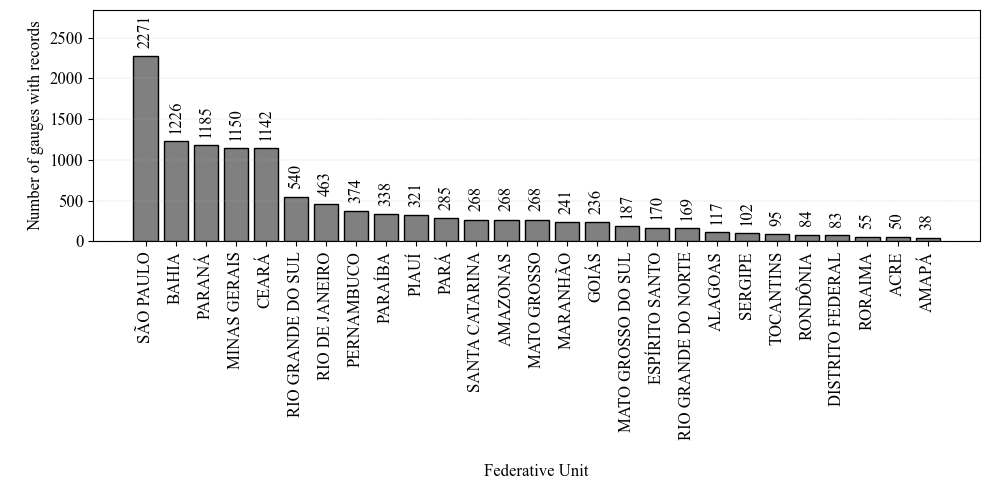

In [14]:
fig, ax = plt.subplots(figsize = (10, 5))

ax.bar(data_state['State'], data_state['Code'], color='grey', edgecolor = 'black')

tnr = {'fontname':'Times New Roman', 'fontsize':12}

plt.setp(plt.gca().get_xticklabels(), rotation = 90, **tnr)
plt.setp(plt.gca().get_yticklabels(), **tnr)
ax.set_ylim(None,max(labels)*1.25)

ax.set_xlabel("\nFederative Unit", **tnr)
ax.set_ylabel("\nNumber of gauges with records", **tnr)

# Make some labels.
rects = ax.patches
  
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height+100, label,
            ha='center', va='bottom', rotation = 90, **tnr)

plt.grid(linestyle = '--', linewidth = 0.2, axis="y")
plt.tight_layout() 

plt.savefig(general_path+'/Figures/stations_by_state_en.jpeg', format='jpeg', dpi=1200, bbox_inches='tight') 
plt.show()
plt.close()

In [15]:
df_start_state = df_downloaded_station_info[['StartDate', 'State']]
data_start_state = pd.pivot_table(df_start_state, values='StartDate', index=['State'], aggfunc=np.min)
data_start_state.sort_values('StartDate', inplace=True, ascending=True)
data_start_state.reset_index(inplace=True)
data_start_state

C:\Users\linde\AppData\Local\Temp\ipykernel_18292\1704833280.py:2: FutureWarning: The provided callable <function min at 0x0000020FE4E0FBA0> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  data_start_state = pd.pivot_table(df_start_state, values='StartDate', index=['State'], aggfunc=np.min)


,State,StartDate
0,MINAS GERAIS,1855-01-31
1,SÃO PAULO,1888-01-01
2,PARANÁ,1889-01-01
3,RIO DE JANEIRO,1900-01-01
4,PARAÍBA,1900-01-01
5,BAHIA,1907-07-01
6,MARANHÃO,1910-05-01
7,PIAUÍ,1910-10-01
8,PERNAMBUCO,1910-10-01
9,CEARÁ,1910-10-01


In [16]:
br_map = geobr.read_state(year = 2020)
br_map.crs = "EPSG:4326"
br_map['name_state'] = br_map['name_state'].apply(str.upper)
br_map = br_map.sort_values(by = ['name_state'])
br_map['name_state'].replace({'AMAZÔNAS': 'AMAZONAS'}, inplace = True)
br_map.head()

,code_state,abbrev_state,name_state,code_region,name_region,geometry
1,12.0,AC,ACRE,1.0,Norte,"MULTIPOLYGON (((-71.07772 -9.82774, -71.07817 ..."
13,27.0,AL,ALAGOAS,2.0,Nordeste,"MULTIPOLYGON (((-35.75791 -9.69285, -35.75801 ..."
5,16.0,AP,AMAPÁ,1.0,Norte,"MULTIPOLYGON (((-50.45011 2.10924, -50.44715 2..."
2,13.0,AM,AMAZONAS,1.0,Norte,"MULTIPOLYGON (((-69.83766 -3.68659, -69.82555 ..."
15,29.0,BA,BAHIA,2.0,Nordeste,"MULTIPOLYGON (((-38.69616 -17.97901, -38.69618..."


In [20]:
data_start_state_map = data_start_state.copy(deep=True)
data_start_state_map.columns =  ['name_state', 'date']
data_start_state_map['year'] = data_start_state_map['date'].dt.year
data_start_state_map

,name_state,date,year
0,MINAS GERAIS,1855-01-31,1855
1,SÃO PAULO,1888-01-01,1888
2,PARANÁ,1889-01-01,1889
3,RIO DE JANEIRO,1900-01-01,1900
4,PARAÍBA,1900-01-01,1900
5,BAHIA,1907-07-01,1907
6,MARANHÃO,1910-05-01,1910
7,PIAUÍ,1910-10-01,1910
8,PERNAMBUCO,1910-10-01,1910
9,CEARÁ,1910-10-01,1910


In [22]:
br_map_count = br_map.merge(data_start_state_map, on = 'name_state', how = 'left')
br_map_count = br_map_count.sort_values(by = ['name_state'])
br_map_count = gpd.GeoDataFrame(br_map_count)
br_map_count['centroid'] = gpd.GeoSeries(br_map_count['geometry']).centroid
br_map_count['year'] = br_map_count['year'].astype(int)
br_map_count = gpd.GeoDataFrame(br_map_count)
br_map_count

C:\Users\linde\AppData\Roaming\Python\Python311\site-packages\geopandas\array.py:546: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return _unary_geo("centroid", self)
C:\Users\linde\AppData\Roaming\Python\Python311\site-packages\geopandas\geoseries.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  data = from_shapely(s.values)


,code_state,abbrev_state,name_state,code_region,name_region,geometry,date,year,centroid
0,12.0,AC,ACRE,1.0,Norte,"MULTIPOLYGON (((-71.07772 -9.82774, -71.07817 ...",1961-01-01,1961,POINT (-70.47293 -9.21327)
1,27.0,AL,ALAGOAS,2.0,Nordeste,"MULTIPOLYGON (((-35.75791 -9.69285, -35.75801 ...",1912-02-01,1912,POINT (-36.62485 -9.51367)
2,16.0,AP,AMAPÁ,1.0,Norte,"MULTIPOLYGON (((-50.45011 2.10924, -50.44715 2...",1962-01-01,1962,POINT (-51.96202 1.44746)
3,13.0,AM,AMAZONAS,1.0,Norte,"MULTIPOLYGON (((-69.83766 -3.68659, -69.82555 ...",1926-01-01,1926,POINT (-64.65309 -4.15410)
4,29.0,BA,BAHIA,2.0,Nordeste,"MULTIPOLYGON (((-38.69616 -17.97901, -38.69618...",1907-07-01,1907,POINT (-41.72116 -12.47533)
5,23.0,CE,CEARÁ,2.0,Nordeste,"MULTIPOLYGON (((-41.18292 -4.01797, -41.18552 ...",1910-10-01,1910,POINT (-39.61579 -5.09322)
6,53.0,DF,DISTRITO FEDERAL,5.0,Centro Oeste,"MULTIPOLYGON (((-47.41734 -15.54655, -47.41720...",1961-01-01,1961,POINT (-47.79685 -15.78117)
7,32.0,ES,ESPÍRITO SANTO,3.0,Sudeste,"MULTIPOLYGON (((-40.75189 -20.92722, -40.75193...",1925-01-01,1925,POINT (-40.66851 -19.57518)
8,52.0,GO,GOIÁS,5.0,Centro Oeste,"MULTIPOLYGON (((-52.36102 -16.08160, -52.36040...",1944-06-27,1944,POINT (-49.62251 -16.04119)
9,21.0,MA,MARANHÃO,2.0,Nordeste,"MULTIPOLYGON (((-44.96620 -1.27114, -44.96081 ...",1910-05-01,1910,POINT (-45.28777 -5.07221)


C:\Users\linde\AppData\Roaming\Python\Python311\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
c:\anaconda3\Lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\linde\AppData\Roaming\Python\Python311\site-packages\geopandas\array.py:546: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return _unary_geo("centroid", self)
C:\Users\linde\AppData\Roaming\Python\Python311\site-packages\geopandas\geoseries.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. C

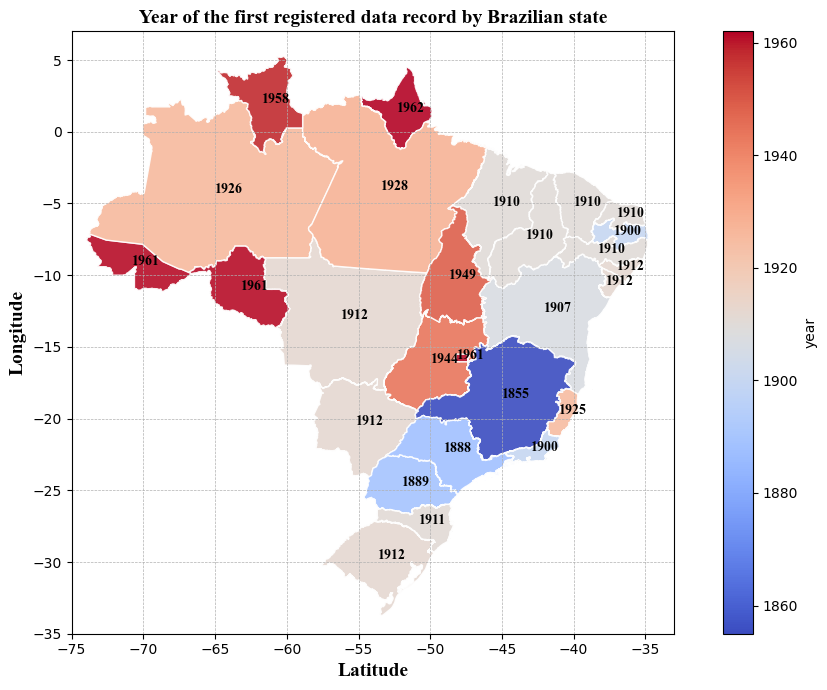

In [38]:
tnr_nrm = {'fontname':'Times New Roman', "fontweight" :"bold",}
tnr = {'fontname':'Times New Roman', "fontweight" :"bold", 'fontsize':10}

fig, ax = plt.subplots(figsize = (10, 7))
br_map_count.plot(ax = ax
                    , edgecolor = 'white'
                    , column = 'year'
                    , legend = False
                    , cmap = 'coolwarm'
                    , alpha = 0.9
                   )
ax.set_title("Year of the first registered data record by Brazilian state", fontsize=14, **tnr_nrm)

#Colocando nome em cada ponto
for x, y, label in zip(br_map_count.centroid.x, br_map_count.centroid.y, br_map_count.year):
   ax.annotate(label, xy=(x, y), xytext=(-4, -1), textcoords="offset points", color = "black",  rotation=0, **tnr)

# ax.legend(loc="lower right", prop={'size':1}, shadow = False)
fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(br_map_count['year'].min(), br_map_count['year'].max()), cmap='coolwarm'),
             ax=ax, orientation='vertical', label='year')
ax.set_ylim([-35, 7])
ax.set_xlim([-75, -33])
ax.set_xlabel('Latitude', fontsize=14, **tnr_nrm)
ax.set_ylabel('Longitude', fontsize=14, **tnr_nrm)
ax.grid(ls='--', linewidth=0.5)
plt.tight_layout()
plt.savefig(general_path+'/Figures/ANA_stations_first_year_1961_2020.jpeg', format='jpeg', dpi=1200, transparent=False, bbox_inches=None)
plt.show()
plt.close()

In [14]:
xticks_labels = np.arange(1855, 1970, step=5)
xticks_labels

array([1855, 1860, 1865, 1870, 1875, 1880, 1885, 1890, 1895, 1900, 1905,
       1910, 1915, 1920, 1925, 1930, 1935, 1940, 1945, 1950, 1955, 1960,
       1965])

In [15]:
xticks = []
for year in xticks_labels:
    xticks.append(datetime(year,1,1))
print(xticks)

[datetime.datetime(1855, 1, 1, 0, 0), datetime.datetime(1860, 1, 1, 0, 0), datetime.datetime(1865, 1, 1, 0, 0), datetime.datetime(1870, 1, 1, 0, 0), datetime.datetime(1875, 1, 1, 0, 0), datetime.datetime(1880, 1, 1, 0, 0), datetime.datetime(1885, 1, 1, 0, 0), datetime.datetime(1890, 1, 1, 0, 0), datetime.datetime(1895, 1, 1, 0, 0), datetime.datetime(1900, 1, 1, 0, 0), datetime.datetime(1905, 1, 1, 0, 0), datetime.datetime(1910, 1, 1, 0, 0), datetime.datetime(1915, 1, 1, 0, 0), datetime.datetime(1920, 1, 1, 0, 0), datetime.datetime(1925, 1, 1, 0, 0), datetime.datetime(1930, 1, 1, 0, 0), datetime.datetime(1935, 1, 1, 0, 0), datetime.datetime(1940, 1, 1, 0, 0), datetime.datetime(1945, 1, 1, 0, 0), datetime.datetime(1950, 1, 1, 0, 0), datetime.datetime(1955, 1, 1, 0, 0), datetime.datetime(1960, 1, 1, 0, 0), datetime.datetime(1965, 1, 1, 0, 0)]


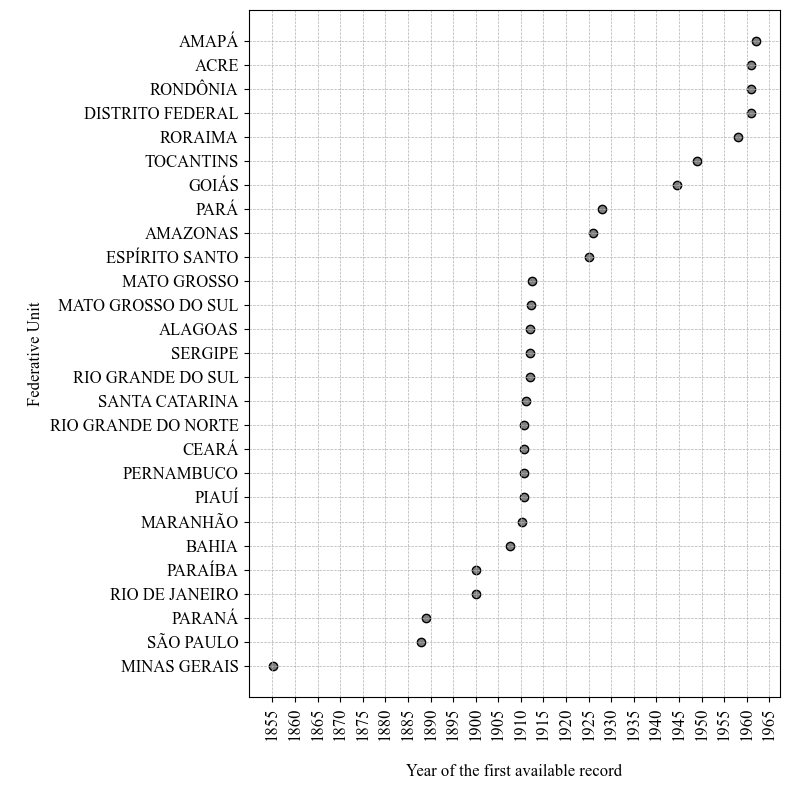

In [16]:
fig, ax = plt.subplots(figsize = (8, 8))

ax.scatter(data_start_state['StartDate'], data_start_state['State'], color='grey', edgecolor = 'black')

tnr = {'fontname':'Times New Roman', 'fontsize':12}

ax.set_ylabel("\nFederative Unit", **tnr)
ax.set_xlabel("\nYear of the first available record", **tnr)

ax.set_xticks(xticks)
ax.set_xticklabels(xticks_labels)

plt.setp(plt.gca().get_xticklabels(), rotation = 90, **tnr)
plt.setp(plt.gca().get_yticklabels(), **tnr)
plt.grid(linestyle = '--', linewidth = 0.5)
plt.tight_layout() 
plt.savefig(general_path+'/Figures/stations_by_first_register.jpeg', format='jpeg', dpi=1200, bbox_inches='tight') 
plt.show()
plt.close()

In [17]:
df_downloaded_station_year = pd.read_hdf(general_path + '/Consolidated Files/BRASIL_RAW_STATION_BY_YEAR.h5')
df_downloaded_station_year

,Code,Year
0,00047000,1958
1,00047000,1959
2,00047000,1960
3,00047000,1961
4,00047000,1962
...,...,...
378658,08560000,1992
378659,08560000,1993
378660,08560000,1994
378661,08560000,1995


In [18]:
df_count = df_downloaded_station_year.copy(deep = True)
df_count['Year'] = 1
df_count

,Code,Year
0,00047000,1
1,00047000,1
2,00047000,1
3,00047000,1
4,00047000,1
...,...,...
378658,08560000,1
378659,08560000,1
378660,08560000,1
378661,08560000,1


In [19]:
df_years_of_activity = pd.pivot_table(df_count, values='Year', index=['Code'], aggfunc=np.sum)
df_years_of_activity = df_years_of_activity.sort_values(by = ["Year"])
df_years_of_activity

C:\Users\linde\AppData\Local\Temp\ipykernel_18784\3194556911.py:1: FutureWarning: The provided callable <function sum at 0x0000020F0A84B380> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_years_of_activity = pd.pivot_table(df_count, values='Year', index=['Code'], aggfunc=np.sum)


,Year
Code,
02243248,1
01061004,1
00657001,1
01538008,1
02449067,1
...,...
00540020,113
00739038,113
02346045,116


In [20]:
bins = [0, 30, 60, 90, 120, 150,  180]
df_cut = pd.DataFrame(pd.cut(df_years_of_activity['Year'], bins = bins, include_lowest=True))
df_cut = df_cut.reset_index(drop=False)
df_cut

,Code,Year
0,02243248,"(-0.001, 30.0]"
1,01061004,"(-0.001, 30.0]"
2,00657001,"(-0.001, 30.0]"
3,01538008,"(-0.001, 30.0]"
4,02449067,"(-0.001, 30.0]"
...,...,...
11721,00540020,"(90.0, 120.0]"
11722,00739038,"(90.0, 120.0]"
11723,02346045,"(90.0, 120.0]"
11724,02549006,"(120.0, 150.0]"


In [21]:
# df_teste = df_cut.set_index(['Year'])
# .count("Code")
df_cut_gb_year = pd.DataFrame(df_cut.groupby(['Year']).count())
df_cut_gb_year

C:\Users\linde\AppData\Local\Temp\ipykernel_18784\4053696144.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cut_gb_year = pd.DataFrame(df_cut.groupby(['Year']).count())


,Code
Year,
"(-0.001, 30.0]",6285
"(30.0, 60.0]",4079
"(60.0, 90.0]",1256
"(90.0, 120.0]",104
"(120.0, 150.0]",1
"(150.0, 180.0]",1


In [22]:
labels = df_cut_gb_year["Code"].values.tolist()
labels

[6285, 4079, 1256, 104, 1, 1]

In [23]:
years_of_act = np.array(df_years_of_activity['Year'])

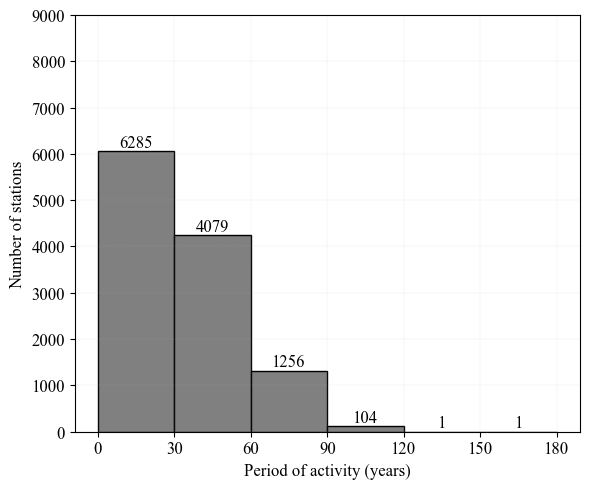

In [24]:
# Creating histogram
fig, ax = plt.subplots(figsize=(6,5))
ax.hist(years_of_act, bins = bins, edgecolor = 'black', color = 'grey')

tnr = {'fontname':'Times New Roman', 'fontsize':12}

# Set title
# ax.set_title('Distribuição das estações por quantidade de anos registrados\n', size=16, **{'fontname':'Times New Roman'})

  
# adding labels
ax.set_xlabel('Period of activity (years)', **tnr)
ax.set_ylabel('Number of stations', **tnr)
ax.set_xticks(bins)
ax.set_xticklabels(bins)
ax.set_ylim(None, 9000)
  
# Make some labels.
rects = ax.patches
  
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height+10, label,
            ha='center', va='bottom', **tnr)
# Show plot
plt.setp(plt.gca().get_xticklabels(), **tnr)
plt.setp(plt.gca().get_yticklabels(), **tnr)
plt.grid(linestyle = '--', linewidth = 0.1)
plt.tight_layout() 
plt.savefig(general_path+'/Figures/station_distribution_years_of_activity.jpeg', format='jpeg', dpi=1200, bbox_inches='tight') 
plt.show()

In [25]:
df_net_range = df_downloaded_station_info[['Code','Years_without_gaps']] #número de anos sem qualquer falha
df_net_range

,Code,Years_without_gaps
0,00047000,0
1,00047002,35
2,00047003,29
3,00047004,35
4,00047005,20
...,...,...
11721,08460003,16
11722,08460004,12
11723,08461000,13
11724,08464001,15


In [26]:
bins = [0, 30, 60, 90, 120]
df_net_range_bins = pd.DataFrame(pd.cut(df_net_range['Years_without_gaps'], bins = bins, include_lowest=True))
df_net_range_bins = df_net_range_bins.reset_index(drop=False)
df_net_range_bins

,index,Years_without_gaps
0,0,"(-0.001, 30.0]"
1,1,"(30.0, 60.0]"
2,2,"(-0.001, 30.0]"
3,3,"(30.0, 60.0]"
4,4,"(-0.001, 30.0]"
...,...,...
11721,11721,"(-0.001, 30.0]"
11722,11722,"(-0.001, 30.0]"
11723,11723,"(-0.001, 30.0]"
11724,11724,"(-0.001, 30.0]"


In [27]:
df_net_range_gb = pd.DataFrame(df_net_range_bins.groupby(['Years_without_gaps']).count())
df_net_range_gb

C:\Users\linde\AppData\Local\Temp\ipykernel_18784\1707652957.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_net_range_gb = pd.DataFrame(df_net_range_bins.groupby(['Years_without_gaps']).count())


,index
Years_without_gaps,
"(-0.001, 30.0]",8155
"(30.0, 60.0]",2934
"(60.0, 90.0]",596
"(90.0, 120.0]",41


In [28]:
labels = df_net_range_gb["index"].values.tolist()
labels

[8155, 2934, 596, 41]

In [29]:
years_of_act_net = np.array(df_net_range['Years_without_gaps'])
years_of_act_net

array([ 0, 35, 29, ..., 13, 15, 12], dtype=int64)

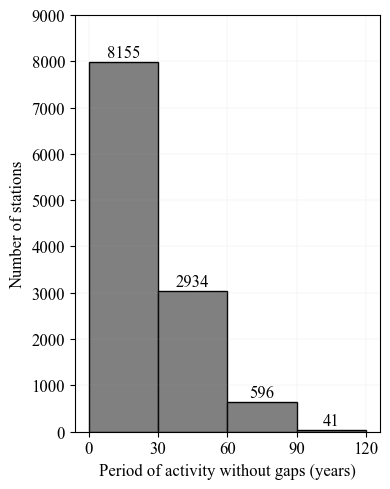

In [30]:
# Creating histogram
fig, ax = plt.subplots(figsize=(4, 5))
ax.hist(years_of_act_net, bins = bins, edgecolor = 'black', color = 'grey')

tnr = {'fontname':'Times New Roman', 'fontsize':12}

# Set title
# ax.set_title('Distribuição das estações por quantidade de anos registrados\nsem dados faltosos', size=16, **{'fontname':'Times New Roman'})

  
# adding labels
ax.set_xlabel('Period of activity without gaps (years)', **tnr)
ax.set_ylabel('Number of stations', **tnr)
ax.set_xticks(bins)
ax.set_xticklabels(bins)
ax.set_ylim(None,9000)
  
# Make some labels
rects = ax.patches
  
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height+10, label,
            ha='center', va='bottom', **tnr)
# Show plot
plt.setp(plt.gca().get_xticklabels(), **tnr)
plt.setp(plt.gca().get_yticklabels(), **tnr)
plt.grid(linestyle = '--', linewidth = 0.1)
plt.tight_layout() 
plt.savefig(general_path+'/Figures/station_distribution_net_years_of_activity.jpeg', format='jpeg', dpi=1200, bbox_inches='tight') 
plt.show()

In [31]:
data = pd.pivot_table(df_downloaded_station_year, values='Code', index=['Year'], aggfunc=np.count_nonzero)
data.reset_index(inplace=True)
data.head(85)

,Year,Code
0,1855,1
1,1856,1
2,1857,1
3,1858,1
4,1859,1
...,...,...
80,1935,769
81,1936,962
82,1937,1183
83,1938,1246


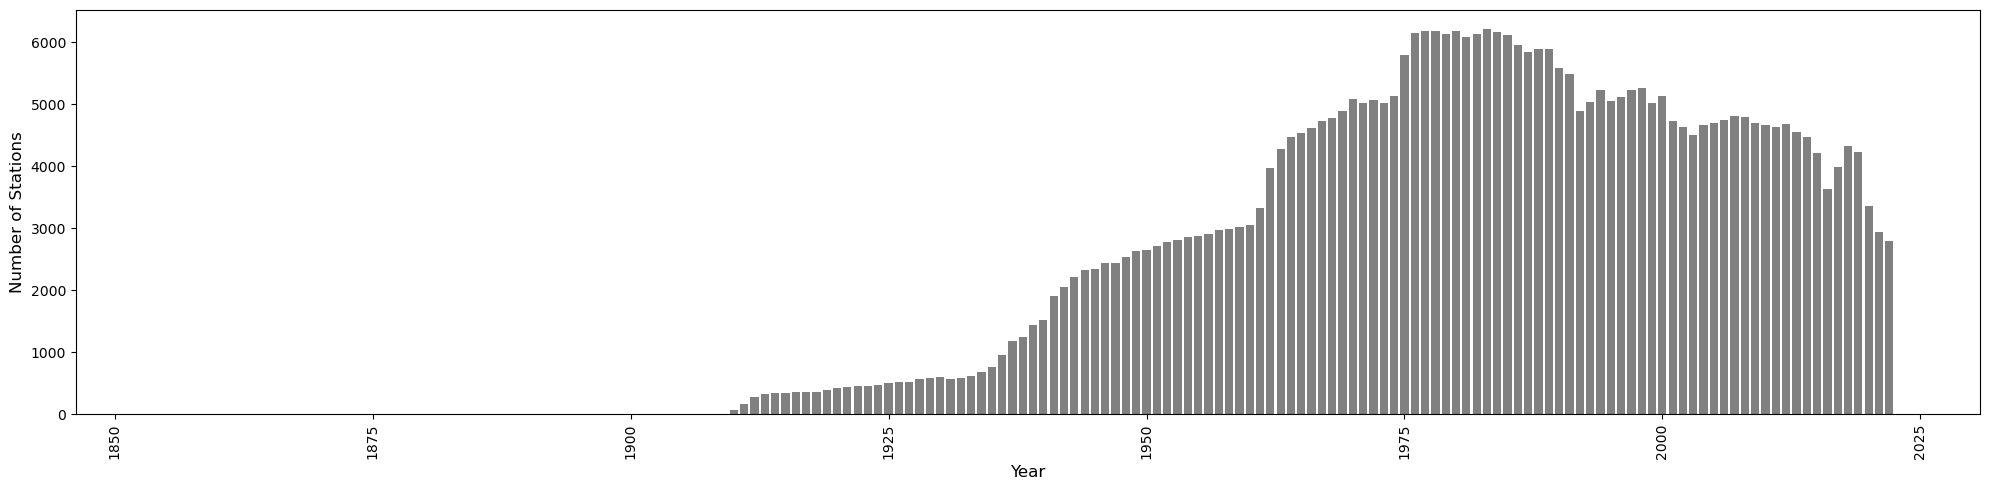

In [32]:
plt.rcParams["figure.figsize"] = (20, 5)
plt.bar(data['Year'], data['Code'], color='grey')

plt.xlabel("Year", size=12)
plt.ylabel("Number of Stations", size = 12)
# plt.title("Number of Stations by year", size=14)

plt.setp(plt.gca().get_xticklabels(), rotation=90)
plt.tight_layout() 

plt.savefig(general_path+'/Figures/stations_by_year.jpeg', format='jpeg', dpi=1200, bbox_inches='tight') 
plt.show()
plt.close()

In [33]:
year = 1920
data_year = data[data['Year']>=year]

xticks_labels = np.arange(year-5, max(data_year['Year'])+5, step=5)

# xticks = []
# for year in xticks_labels:
#     xticks.append(datetime(year,1,1))
    
xticks_labels

array([1915, 1920, 1925, 1930, 1935, 1940, 1945, 1950, 1955, 1960, 1965,
       1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020,
       2025])

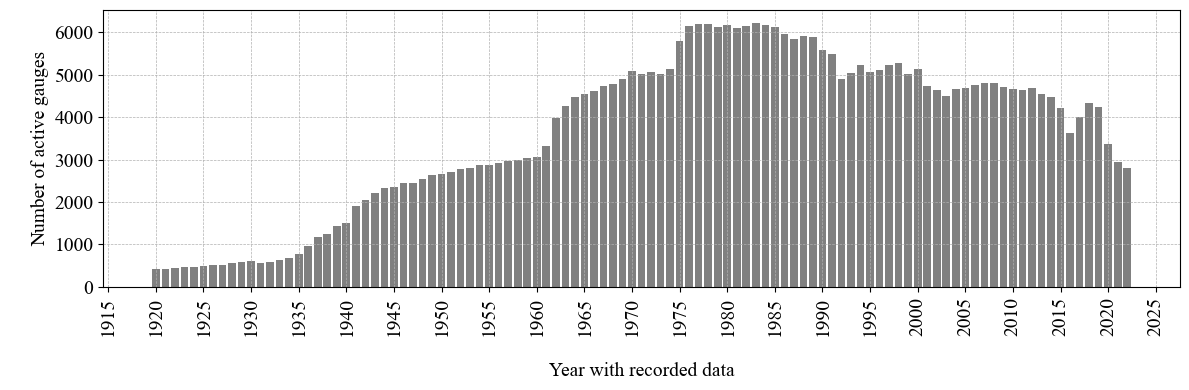

C:/Users/linde/OneDrive/Hidroweb/Figures/stations_by_year_1920_2022.jpeg


In [34]:
# Creating plot
fig, ax = plt.subplots(figsize=(12, 4))
ax.bar(data_year['Year'], data_year['Code'], color='grey')

tnr = {'fontname':'Times New Roman', 'fontsize':14}


plt.xlabel("\nYear with recorded data", **tnr)
plt.ylabel("\nNumber of active gauges", **tnr)
# plt.title("Número de estações ativas (1920 – 2022)", size=16, **{'fontname':'Times New Roman'})

ax.set_xticks(xticks_labels)
ax.set_xticklabels(xticks_labels)

plt.setp(plt.gca().get_xticklabels(), rotation = 90, **tnr)
plt.setp(plt.gca().get_yticklabels(), **tnr)
plt.grid(linestyle = '--', linewidth = 0.5)
plt.tight_layout() 

plt.savefig(general_path+'/Figures/stations_by_year_'+str(year)+'_'+str(max(data_year['Year']))+'.jpeg', format='jpeg', dpi=1200, bbox_inches='tight') 
plt.show()
plt.close()
print(general_path+'/Figures/stations_by_year_'+str(year)+'_'+str(max(data_year['Year']))+'.jpeg')

### STATIONS BY RESPONSIBLE AGENGY

In [35]:
df_agency = df_downloaded_station_info[['Responsible', 'Code']]
data_agency = pd.pivot_table(df_agency, values='Code', index=['Responsible'], aggfunc=np.min)
data_agency.sort_values('Code', inplace=True, ascending=False)
data_agency.reset_index(inplace=True)
data_agency.head(10)

C:\Users\linde\AppData\Local\Temp\ipykernel_18784\114888537.py:2: FutureWarning: The provided callable <function min at 0x0000020F0A84BBA0> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  data_agency = pd.pivot_table(df_agency, values='Code', index=['Responsible'], aggfunc=np.min)


,Responsible,Code
0,CLM,03152009
1,JAGUARI,02954035
2,SEMA-RS,02951032
3,SOPRS,02951012
4,IRGA,02950012
5,COOPERLUZ,02854020
6,DEMEI,02853001
7,ELETROCAR,02852029
8,CAROLINA,02851069
9,CERAN,02851059


In [36]:
data = pd.pivot_table(df_agency, values='Code', index=['Responsible'], aggfunc=np.count_nonzero)
data.sort_values('Code', inplace=True, ascending=False)
data.reset_index(inplace=True)
data = data[data['Code']>=200]
resp_list = data['Responsible'].values.tolist()
data

,Responsible,Code
0,ANA,3676
1,DAEE-SP,1674
2,SUDENE,1281
3,AGUASPARANÁ,807
4,FUNCEME-CE,781
5,INMET,628
6,DNOCS,567
7,AESA-PB,207


In [37]:
df_station_last_years = df_downloaded_station_year[df_downloaded_station_year['Year'] >= 2013]
df_station_last_years_agency = df_station_last_years.merge(df_downloaded_station_info[['Code', 'Responsible']], how = 'left', on = 'Code')
df_station_last_years_agency
# data_agency = pd.pivot_table(df_agency, values='Code', index=['Responsible'], aggfunc=np.min)
# data_agency.sort_values('Code', inplace=True, ascending=False)
# data_agency.reset_index(inplace=True)
# data_agency.head(10)

,Code,Year,Responsible
0,00047002,2013,ANA
1,00047002,2014,ANA
2,00047002,2015,ANA
3,00047002,2016,ANA
4,00047002,2017,ANA
...,...,...,...
38520,08464001,2016,ANA
38521,08464001,2017,ANA
38522,08464001,2018,ANA
38523,08464001,2019,ANA


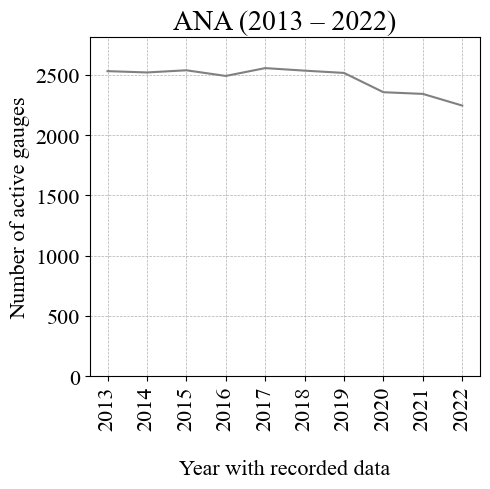

C:/Users/linde/OneDrive/Hidroweb/Figures/stations_by_year_ANA_last_years.jpeg


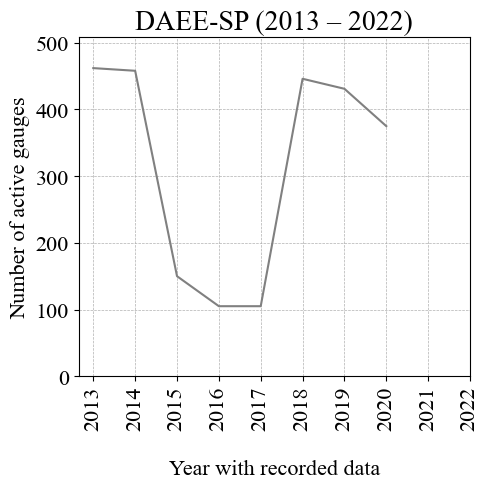

C:/Users/linde/OneDrive/Hidroweb/Figures/stations_by_year_DAEE-SP_last_years.jpeg


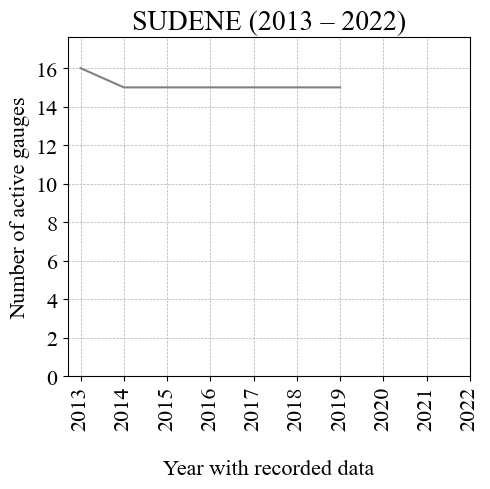

C:/Users/linde/OneDrive/Hidroweb/Figures/stations_by_year_SUDENE_last_years.jpeg


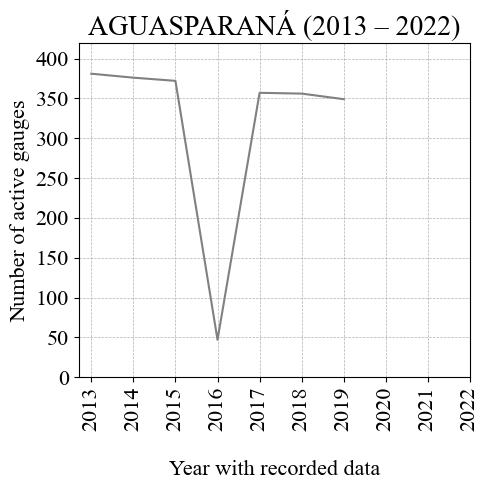

C:/Users/linde/OneDrive/Hidroweb/Figures/stations_by_year_AGUASPARANÁ_last_years.jpeg


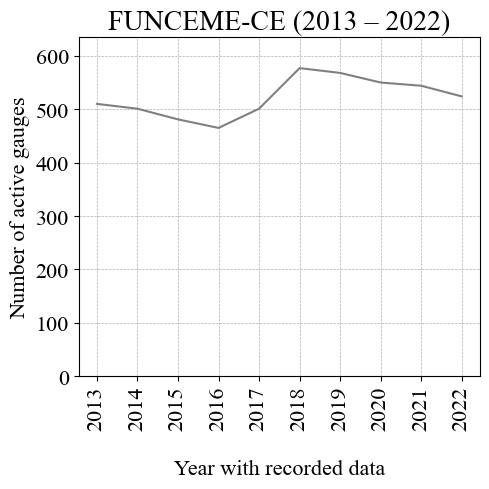

C:/Users/linde/OneDrive/Hidroweb/Figures/stations_by_year_FUNCEME-CE_last_years.jpeg


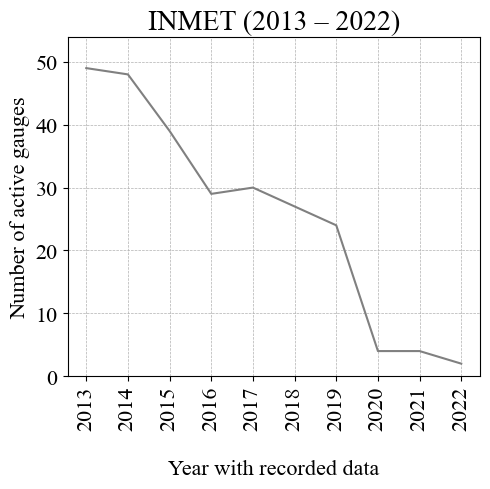

C:/Users/linde/OneDrive/Hidroweb/Figures/stations_by_year_INMET_last_years.jpeg


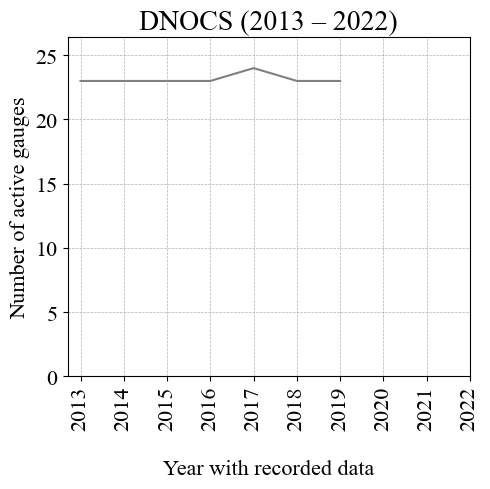

C:/Users/linde/OneDrive/Hidroweb/Figures/stations_by_year_DNOCS_last_years.jpeg


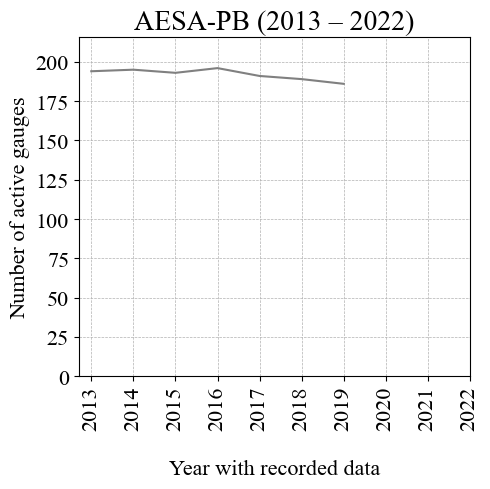

C:/Users/linde/OneDrive/Hidroweb/Figures/stations_by_year_AESA-PB_last_years.jpeg


In [38]:
for resp in resp_list:
#     print(resp)
    df_temp = df_station_last_years_agency[df_station_last_years_agency['Responsible'] == resp]
    df_pivot = pd.pivot_table(df_temp[['Code', 'Year']], values='Code', index=['Year'], aggfunc=np.count_nonzero)
    df_pivot.reset_index(inplace=True)
#     print(df_pivot)
    if len(df_pivot) > 1: 
        xticks_labels = np.arange(min(df_station_last_years_agency['Year']), max(df_station_last_years_agency['Year']+1), step=1)
        # Creating plot
        fig, ax = plt.subplots(figsize=(5,5))
        ax.plot(df_pivot['Year'], df_pivot['Code'], color='grey')
        tnr = {'fontname':'Times New Roman', 'fontsize':16}
        plt.xlabel("\nYear with recorded data", **tnr)
        plt.ylabel("Number of active gauges", **tnr)
        plt.title(resp+" ("+str(min(df_station_last_years_agency['Year']))+" – "+str(max(df_station_last_years_agency['Year']))+")", size=20, **{'fontname':'Times New Roman'})
        ax.set_xticks(xticks_labels)
        ax.set_xticklabels(xticks_labels)
        ax.set_ylim(0, max(df_pivot['Code'])*1.1)
        plt.setp(plt.gca().get_xticklabels(), rotation = 90, **tnr)
        plt.setp(plt.gca().get_yticklabels(), **tnr)
        plt.grid(linestyle = '--', linewidth = 0.5)
        plt.tight_layout() 
        plt.savefig(general_path+'/Figures/stations_by_year_'+resp+'_last_years.jpeg', format='jpeg', dpi=1200, bbox_inches='tight') 
        plt.show()
        plt.close()
        print(general_path+'/Figures/stations_by_year_'+resp+'_last_years.jpeg')

In [39]:
labels = data['Code'].values.tolist()
labels

[3676, 1674, 1281, 807, 781, 628, 567, 207]

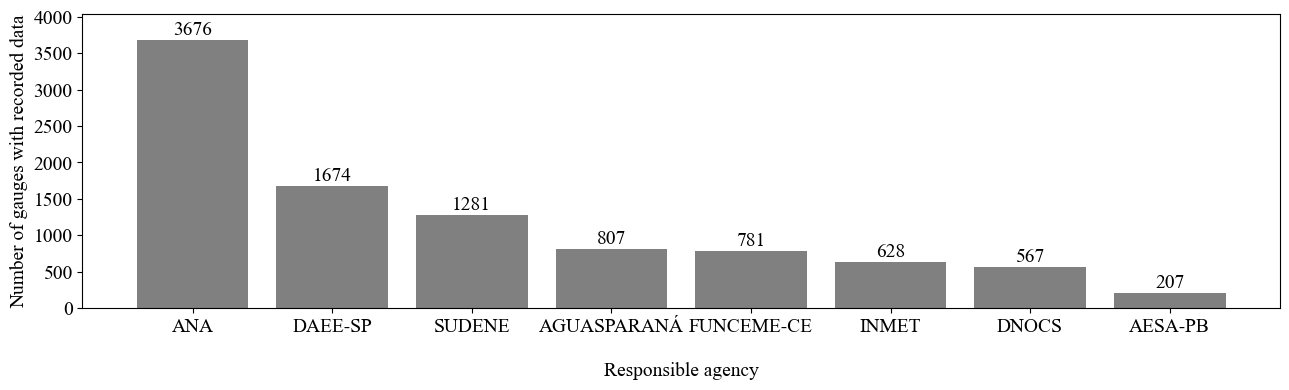

In [40]:
fig, ax = plt.subplots(figsize=(13, 4))
ax.bar(data['Responsible'], data['Code'], color='grey')

tnr = {'fontname':'Times New Roman', 'fontsize':14}


ax.set_ylim(None,max(labels)*1.1)
ax.set_xlabel("\nResponsible agency", **tnr)
ax.set_ylabel("Number of gauges with recorded data", **tnr)
# plt.title("Número de estações por órgão responsável\n", size=16, **{'fontname':'Times New Roman'})

# Make some labels.
rects = ax.patches
  
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height+15, label,
            ha='center', va='bottom', **tnr)

plt.setp(plt.gca().get_xticklabels(), **tnr)
plt.setp(plt.gca().get_yticklabels(), **tnr)
# plt.grid(linestyle = '--', linewidth = 0.5, axis="y")
plt.tight_layout()

plt.savefig(general_path+'/Figures/stations_by_agency.jpeg', format='jpeg', dpi=1200, bbox_inches='tight') 
plt.show()
plt.close()

In [41]:
all_files = glob.glob(general_path + '/Temp/*.h5')
count = 0
for filename in all_files:
    df = pd.read_hdf(filename)
    df.reset_index(inplace=False)
    df = df[['Code', 'Date', 'Value']]
#     print(df)
    if count == 0:
        df_total = df.copy(deep = True)
    else:
        df_total = pd.concat([df_total, df], ignore_index = True)
    count = count + 1
    print("File", count, filename)
print(count, "files are loaded")

File 1 C:/Users/linde/OneDrive/Hidroweb/Temp\BRASIL_RAW_SUMMARY_0.h5
File 2 C:/Users/linde/OneDrive/Hidroweb/Temp\BRASIL_RAW_SUMMARY_1.h5
File 3 C:/Users/linde/OneDrive/Hidroweb/Temp\BRASIL_RAW_SUMMARY_2.h5
File 4 C:/Users/linde/OneDrive/Hidroweb/Temp\BRASIL_RAW_SUMMARY_3.h5
File 5 C:/Users/linde/OneDrive/Hidroweb/Temp\BRASIL_RAW_SUMMARY_4.h5
File 6 C:/Users/linde/OneDrive/Hidroweb/Temp\BRASIL_RAW_SUMMARY_5.h5
File 7 C:/Users/linde/OneDrive/Hidroweb/Temp\BRASIL_RAW_SUMMARY_6.h5
File 8 C:/Users/linde/OneDrive/Hidroweb/Temp\BRASIL_RAW_SUMMARY_7.h5
File 9 C:/Users/linde/OneDrive/Hidroweb/Temp\BRASIL_RAW_SUMMARY_8.h5
File 10 C:/Users/linde/OneDrive/Hidroweb/Temp\BRASIL_RAW_SUMMARY_9.h5
10 files are loaded


In [42]:
df_total

,Code,Date,Value
0,00047000,1958-01-01,0.0
1,00047000,1958-01-02,0.0
2,00047000,1958-01-03,0.0
3,00047000,1958-01-04,0.0
4,00047000,1958-01-05,4.8
...,...,...,...
128943482,08560000,1996-02-25,25.8
128943483,08560000,1996-02-26,0.0
128943484,08560000,1996-02-27,0.0
128943485,08560000,1996-02-28,0.0


In [43]:
df_rainfall = df_total[(df_total['Value'] > 0) & (df_total['Value'] <= 450)]
df_rainfall.reset_index(inplace=True,drop=True)
df_rainfall

,Code,Date,Value
0,00047000,1958-01-05,4.8
1,00047000,1958-01-09,3.2
2,00047000,1958-01-11,10.4
3,00047000,1958-01-12,3.6
4,00047000,1958-01-13,11.4
...,...,...,...
35225579,08560000,1996-02-04,8.4
35225580,08560000,1996-02-06,63.8
35225581,08560000,1996-02-14,12.2
35225582,08560000,1996-02-15,3.8


In [44]:
rainfall_array = np.array(df_rainfall['Value'])
len(rainfall_array)
max(rainfall_array)

450.0

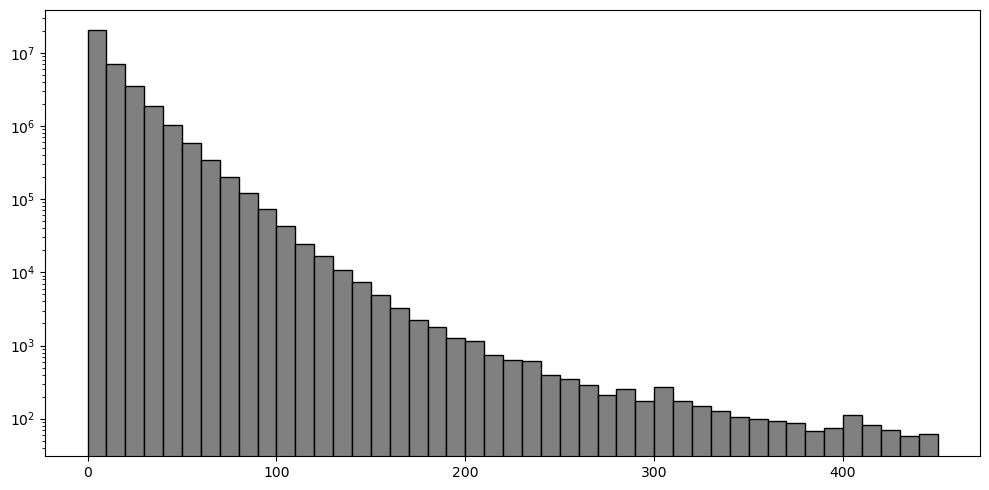

In [45]:
plt.rcParams["figure.figsize"] = (10, 5)
plt.hist(rainfall_array, bins = 45, edgecolor='black', log = True, color = 'grey') #data and number of bins
# plt.legend()
# plt.title('Rainfall Daily Distribuition (logarithmic scale)')
# plt.xlabel('rainfall [mm]')
# plt.ylabel('number of events')
plt.tight_layout()
plt.savefig(general_path+'/Figures/rainfall_event_frequency_distribution.jpeg', format='jpeg', dpi=1200, bbox_inches='tight') 
plt.show()
plt.close()